### Collection of convenient methods and examples for plotting nice charts
Plotting nice charts in notebook can be time-consuming for novice Python users. You need to remember all the syntax for setting the style, labels, legend, etc., and you need to manipulate your data to get what you want. Here, I'm trying to write some simple wrappers around existing plotting functions in Pandas, Seaborn, etc., and simplify the function definition with only the most commonly used parameters.

In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cycler
from matplotlib.ticker import FuncFormatter
%matplotlib inline

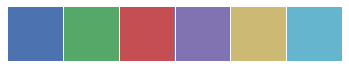

In [10]:
# default seaborn palette
current_palette = sns.color_palette()
sns.palplot(current_palette)

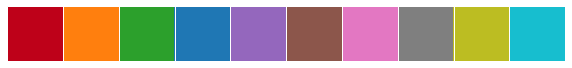

In [11]:
# Color scheme 1: modified from cat10 (d3). 
# Change the sequence depending on what you want as the default first few colors on your chart. 
# Here the default is set to scarlet red.
cat10_palette = ['#be0119', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd', 
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.palplot(sns.color_palette(cat10_palette))

In [12]:
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(cat10_palette))

In [28]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [128]:
def plot_hist(s, ax=None, x_label=None, y_label=None, title=None, 
              lb=None, ub=None, bins=50, log_x=False, figsize=(6, 4)):
    """
    Plots a histogram using pandas's built-in histogram plotting
    
    Parameters
    ----------
    s: pandas series
    ax: if provided, plot on this axis
    x_label, y_label: x and y axis labels
    title: title of chart
    lb, ub: lower bound and upper bound of data to be plotted
    bins: number of bins in histogram
    log_x: boolean. whether to use log spaced bins
    figsize: tuple. size of the chart
    """
    if lb is not None:
        s = s[(s > lb)]
    if ub is not None:
        s = s[(s < ub)]
    
    if ax is None:
        fig, ax = plt.subplots()
    
    if log_x == True:
        if (s <= 0).sum() > 0:
            raise ValueError('To use log scale, all values need to be positive') 
#         s = np.log10(s)
        bins = np.logspace(np.log10(s.min()), np.log10(s.max()), bins)
        plt.xscale('log')
        
    s.hist(bins=bins, ax=ax, figsize=figsize)
    
    if title is not None:
        ax.set_title(title)
    else:
        ax.set_title('Histogram')
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
        
#     if log_x == True:
#         def format_fn(tick_val, tick_pos):
#             return 10**tick_val
#         ax.xaxis.set_major_formatter(FuncFormatter(format_fn))

        
# cumulative fraction plot (ECDF)
def plot_fraction(s, x_percentage=False, x_cumulative=False, ax=None, x_label=None, y_label=None, title=None, 
              lb=None, ub=None, bins=50, figsize=(6, 4)):
    """
    Plots a cumulative fraction plot
    
    Parameters
    ----------
    s: pandas series
    x_percentage: boolean. If True, show x values as percentage instead of actual values
    x_cumulative: boolean. If True, show cumulative x values
    ax: if provided, plot on this axis
    x_label, y_label: x and y axis labels
    title: title of chart
    lb, ub: lower bound and upper bound of data to be plotted
    bins: number of bins in histogram
    figsize: tuple. size of the chart
    """
    from statsmodels.distributions.empirical_distribution import ECDF
    
    if ax is None:
        fig, ax = plt.subplots()
    
    ecdf = ECDF(df.fare)
    x = ecdf.x
    y = ecdf.y
    
    if x_cumulative == True:
        x[np.isneginf(x)] = 0
        x = x.cumsum()
    if x_percentage == True:
        x = x/x.max()
    
    ax.plot(x, y)
    if title is not None:
        ax.set_title(title)
    else:
        ax.set_title('Cumulative Fraction Plot')
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)

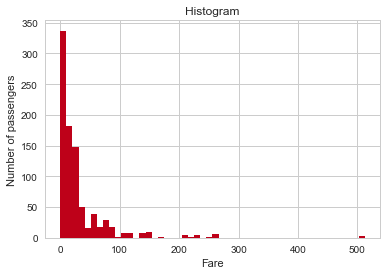

In [79]:
plot_hist(df.fare, x_label='Fare', y_label='Number of passengers')

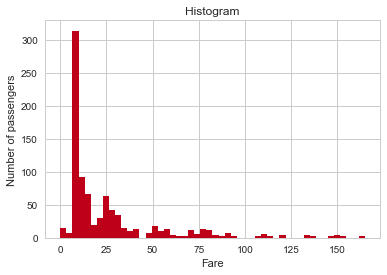

In [80]:
plot_hist(df.fare, x_label='Fare', y_label='Number of passengers', ub=200)

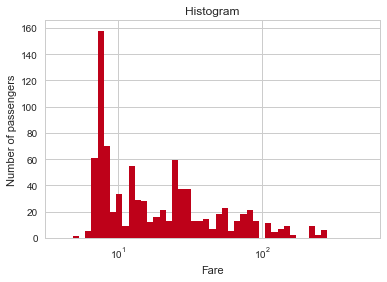

In [78]:
plot_hist(df.fare[df.fare > 0], x_label='Fare', y_label='Number of passengers', log_x=True)

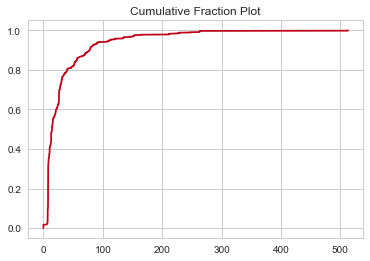

In [131]:
plot_fraction(df.fare)

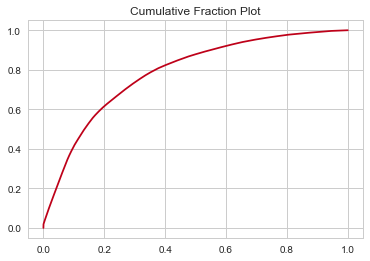

In [130]:
plot_fraction(df.fare, x_cumulative=True, x_percentage=True)

In [ ]:
# plotting multiple charts
